# การวิเคราะห์โดยอาศัยกราฟและสมการเชิงเส้น
การตรวจสอบทฤษฎีโดยการทดลองจำเป็นต้องมีเครื่องมือสำหรับการวิเคราะห์ เครื่องมือที่นิยมใช้คือ สมการเชิงเส้น
ในการตรวจสอบทฤษฎี จะมีข้อมูลของปริมาณที่ต้องการตรวจสอบ ข้อมูลชุดหนึ่งได้จากการทดลอง อีกชุดได้จากทฤษฎี 
หลักในการตรวจสอบคือ

> พิจราณาความแตกต่างของข้อมูลสองชุดนี้ ถ้าความต่างไม่มากกว่าความไม่แน่นอนในการวัด 
ตัวทฤษฎีผ่านการตรวจสอบโดยการทดลองนี้

เพื่อละความซับซ้อนในเรื่องจำนวนข้อมูล เรื่องความไม่แน่นอนในการวัด จะใช้ผลการวัดและทษฎีสมมุติเป็นตัวอย่าง
 สมมุติว่าทฤษฎีที่เรากำลังตรวจสอบบอกว่า $y$ แปรผันตรงกับ $x$ $(y \; \alpha \; x)$ โดยค่าคงที่ของการแปรผัน $m$ หรือ อัตราการเปลี่ยนแปลง
ของ $y$ เที่ยบกับ $x$ คือ $m = 1$ โดยที่ค่าเริ่มต้น (ค่าของ $y$ ตอนที่ $x = 0$) คือ $y_0 = 0$ ซึ่งหมายความว่า สมการของทฤษฎีคือ
> $$ y = x$$

การทดลองทำโดยควบคุมปริมาณ $x$ ให้มีค่าแตกต่างกัน 3 ค่าและทำการวัดปริมาณ $y$ ความไม่แน่นอนในการควบคุม $x$ น้อยเมื่อเทียบกับความไม่แน่นอนของการวัด $y$
ดังนั้นถือว่าความไม่แนอนของ $x$ ไม่มี มีเฉพาะความไม่แน่นอนของ $y$ แต่ละผลการวัดนี้มีความไม่แน่นอนเท่ากันคือ $\pm 0.2$ โค้ดใน เซลล์ถัดไปเป็นการนำข้อมูลจากการทดลองเก็บไว้ที่
ตัวแปร x_data และ y_data

In [1]:
# นำเครื่องมือที่มีประโยชน์ต่อการคำนวณข้ามาใช้งาน (นำขึ้นหน่วยความจำ)
%matplotlib widget
from sympy import *
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
mpl.font_manager.fontManager.addfont("fonts/LeelawUI.ttf")
mpl.rc('font', family="Leelawadee UI")
plt.style.use('fonts/phy1.mplstyle')
np.set_printoptions(precision=1)
np.set_printoptions(floatmode="fixed")

# ป้อนข้อมูลเก็บไว้ในหน่่วยควจำในรูปแบบของ numpy array
x_data = np.array([1.0, 2.0, 3.0])
y_data = np.array([1.1, 2.1, 2.9])
y_err = 0.2
## แสดงผลข้อมูลในเซลล์แสดงผล
Markdown(f"""
ข้อมูลที่ใช้พิจารณา <br/>
ตัวแปรต้น x_data  = {x_data} <br/>
ตัวแปรตาม y_data = {y_data} $\pm 0.2$
""")


ข้อมูลที่ใช้พิจารณา <br/>
ตัวแปรต้น x_data  = [1.0 2.0 3.0] <br/>
ตัวแปรตาม y_data = [1.1 2.1 2.9] $\pm 0.2$


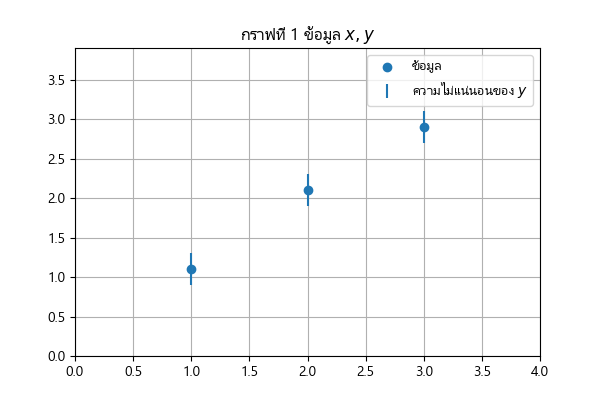

In [2]:
# ทำกราฟของข้อมูล
fig, ax = plt.subplots(figsize=(6, 4))
fig.canvas.header_visible = False
ax.set_xlim([0, x_data[-1]+1])
ax.set_ylim([0, y_data[-1]+1])
ax.grid(True)

ax.scatter(x_data, y_data)
ax.errorbar(x_data, y_data, yerr=y_err, fmt=" ")
ax.legend(["ข้อมูล", "ความไม่แน่นอนของ $y$"])
ax.set_title("กราฟที่ 1 ข้อมูล $x, y$")
plt.show()

## การวิเคราะห์
การวิเคราะห์นี้อาศัย สมการเชิงเส้น เป็นเครื่องมือในการวิเคราะห์เครื่องมือนี้มีอยู่ใน ชุดเครื่องมือ sympy
ซึ่งได้นำเขามาแล้วในเซลล์ก่อนหน้านี้ การกำหนดสมการทำในเซลล์ถัดไปซึ่งจะได้สมการ (A) 

In [3]:
# กำหนดสัญญลักษ์สำหรับสร้างสมการโดย ฟังก์ชัน symbols ในชุดเครื่องมือ syspy
m, y_0, x , y = symbols('m y_0 x , y')
# สร้างสมการโดยใช้ ฟังก์ชัน Eq
สมการเชิงเส้น = Eq(y, m*x + y_0)
# แสดงสมการ

Markdown(f""" 
${latex(สมการเชิงเส้น)}  \qquad (A)$<br/>
$\quad m \; คืออัตราเปลี่ยนแปลงของ \;y \;เทียบกับ\; x \;(หรือ ความชันของเส้นตรง)$<br/>
$\quad y_0 \; คือค่าเริ่มต้น (หรือ จุดตัดแกน \;y) $<br/>
""")


 
$y = m x + y_{0}  \qquad (A)$<br/>
$\quad m \; คืออัตราเปลี่ยนแปลงของ \;y \;เทียบกับ\; x \;(หรือ ความชันของเส้นตรง)$<br/>
$\quad y_0 \; คือค่าเริ่มต้น (หรือ จุดตัดแกน \;y) $<br/>


ใช้สมการ A และ ข้อมูลจากการทดลองสร้างระบบสมการโดยแทน ข้อมูล x และ y ในสมการ A
ซึ่งจะได้ระบบสมการที่ 1

In [4]:
# แทนข้อมูลที่ได้จากการทดลองลงในสมการ A โดยใช้ฟังก์ชั้น subs (ย่อมาก substitute)
eqs = [สมการเชิงเส้น.subs([(x,x_data[i-1]), (y,y_data[i-1])]) for i in range(x_data.size)]
eqs_str ="### ระบบสมการที่ 1\n"
i = 1
for j in eqs:
    eqs_str += f"${latex(j)}\qquad ({i})$ <br/>"
    i += 1
# แสดงระบบสมการ

Markdown(eqs_str)

### ระบบสมการที่ 1
$2.9 = 3.0 m + y_{0}\qquad (1)$ <br/>$1.1 = 1.0 m + y_{0}\qquad (2)$ <br/>$2.1 = 2.0 m + y_{0}\qquad (3)$ <br/>

ระบบสมการนี้เป็นระบบ สามสมการ สองตัวแปร ถ้ามองในแง่ของกราฟคำตอบระบบสมการนี้คือ
เส้นตรงหนึ่งที่มีค่าความชัน ค่าหนึ่งคือ $m$ และ จุดตัดแกนจุดหนึ่ง $y_0$ ซึ่งยังไม่ทราบค่า หรือ 
กล่าวได้ว่าเป็นตัวแปรของระบบสมการ ถ้าเราย้อนกลับไปพิจารณากราฟที่ 1 จะเห็นได้ว่า
จุดข้อมูล $x$ $y$ ไม่เรียงตัวอยู่บนเส้นตรงเดียวกัน ดังนั้นระบบสมการนี้ไม่มีความตอบ
นอกจากมองในแง่ของกราฟเราสามารถมองในแง่ของระบบสมการเชิงเส้นได้ กล่าวคือระบบสมการเชิงเส้น
จะมีคำตอบเมื่อ เป็นระบบที่มีจำนวนสมการเท่ากับจะนวนตัวแปร ในกรณีนี้ไม่ใช้เราต้องเพิ่มอีกหนึ่งตัวแปร
หรือไม่ก็ตัดออกหนึ่งสมการ

การแก้ปัญหาโดยการตัดสมการออก หรือ เพิ่มตัวแปรเข้าไป ยังไม่ใช้การแก้ปัญหาที่ดีที่สุด
การแก้ปัญหาที่ดีกว่าคือ ไม่ต้องตัดออกหรือเพิ่มเข้า การแก้ปัญหาด้วยวิธีนี้ทำได้โดยอาศัย ความคิดหนึ่งใน
คณิตศาตร์ คือ เมตริก เราจะเปลี่ยนระบบสามสมการ เป็น สมการของเมตริก โดยเปลี่ยนสามค่าของ $y$ ทาง
ด้านซ้ายเป็น เมตริก $b$ เปลี่ยนตัวแปรของสมการ $m$ $y_0$ เป็นเมตริก $c$ และ เปลี่ยนค่าที่คูณอยู่กับตัวแปร
เป็นเมตริก A โดยอาศัยเครื่องมือที่มีอยู่ใน numpy คือ ฟังก์ชัน Matrix ดังแสดงในเซลล์ถัดไป

In [5]:
A = Matrix([x_data,[1 for _ in range(x_data.size)]]).transpose()
b = Matrix(y_data)
c = Matrix([m,y_0])
ระบบสมการ2 = Eq(b, A*c)
Markdown(f"""
ระบบสมการในรูป เมตริก<br/><br/>
${latex(ระบบสมการ2)}$ <br/><br/>
เขียนทางด้ายขวาในรูปของผลคูณ Ac<br/><br/>
${latex(b)} = {latex(A)} {latex(c)}$ <br/><br/>
เขียนรูปสัญญลักษ์ (เพื่อทำพีชคณิตของเมตริก)<br/><br/>
$b = Ac \qquad (4)$ <br/>
เมื่อ <br/>
$\quad b = {latex(b)}$
$\quad A = {latex(A)}$
$\quad c = {latex(c)}$
""")


ระบบสมการในรูป เมตริก<br/><br/>
$\left[\begin{matrix}1.1\\2.1\\2.9\end{matrix}\right] = \left[\begin{matrix}1.0 m + y_{0}\\2.0 m + y_{0}\\3.0 m + y_{0}\end{matrix}\right]$ <br/><br/>
เขียนทางด้ายขวาในรูปของผลคูณ Ac<br/><br/>
$\left[\begin{matrix}1.1\\2.1\\2.9\end{matrix}\right] = \left[\begin{matrix}1.0 & 1\\2.0 & 1\\3.0 & 1\end{matrix}\right] \left[\begin{matrix}m\\y_{0}\end{matrix}\right]$ <br/><br/>
เขียนรูปสัญญลักษ์ (เพื่อทำพีชคณิตของเมตริก)<br/><br/>
$b = Ac \qquad (4)$ <br/>
เมื่อ <br/>
$\quad b = \left[\begin{matrix}1.1\\2.1\\2.9\end{matrix}\right]$
$\quad A = \left[\begin{matrix}1.0 & 1\\2.0 & 1\\3.0 & 1\end{matrix}\right]$
$\quad c = \left[\begin{matrix}m\\y_{0}\end{matrix}\right]$


หลังจากได้สมการของเมตริก A เราจะอาศัยความจริงทางคณิตศาสตร์ กล่าวคือ สองเมตริกที่เท่ากันใน
กรณีนึ้เคือ เมตริก $b$ เท่ากับเมตริก $Ac$ เมื่อถูกคูณด้วยเมตริกเดียวกันในกรณีนี้ คือ $A^T$ หลังจากคูณแล้ว
เมตริกผลคูณยังเท่ากันอยู่ หรือเขียนเป็นสมการได้ว่า <br/><br/>
$A^Tb = A^TAc \qquad (5)$<br/>

In [6]:
Markdown(f"""
ทรานสโพสของเมตริก $A$
ซึ่งแทนด้วยสัญญลักษ์ $A^T$ หมายความว่ากลับแถวและหลักของ $A$ หรือกล่าวได้ว่า
สร้างแถวของ $A^T$ จากหลักของ $A$ และ สร้างหลักของ $A^T$ จากจากแถวของ $A$ ดังแสดง<br/><br/>
$A = {latex(A)} \qquad  A^T = {latex(A.transpose())}$<br/><br/>
เขียนสมการ (5) ในรูปของสมาชิกของเมตริกจะได้<br/><br/>
${latex(A.transpose())} {latex(b)} = {latex(A.transpose())}{latex(A)}{latex(c)}$<br/><br/>
คูณเมตริกทางด้ายซ้าย และ สองเมตริกแรกทางด้านขวาจะได้<br/><br/>
${latex(A.transpose()*b)} = {latex(A.transpose()*A)}{latex(c)}$<br/><br/>
คูณเมตริกสองตัวทางด้านขาวสุดท้ายจะได้สมการของเมตริก<br/><br/>
${latex(A.transpose()*b)} = {latex(A.transpose()*A*c)}$<br/><br/>
จะเห็นว่าสมการที่ได้นี้เป็นระบบสมการ สองสมการ สองตัวแปร สามารถหาคำตอบได้โดยอาศัย ฟังก์ชัน solve ซึ่งเป็นเครื่องมือหนึ่ง
ในโมดูล sympy ดังแสดงใน เซลล์ถัดไป
""")


ทรานสโพสของเมตริก $A$
ซึ่งแทนด้วยสัญญลักษ์ $A^T$ หมายความว่ากลับแถวและหลักของ $A$ หรือกล่าวได้ว่า
สร้างแถวของ $A^T$ จากหลักของ $A$ และ สร้างหลักของ $A^T$ จากจากแถวของ $A$ ดังแสดง<br/><br/>
$A = \left[\begin{matrix}1.0 & 1\\2.0 & 1\\3.0 & 1\end{matrix}\right] \qquad  A^T = \left[\begin{matrix}1.0 & 2.0 & 3.0\\1 & 1 & 1\end{matrix}\right]$<br/><br/>
เขียนสมการ (5) ในรูปของสมาชิกของเมตริกจะได้<br/><br/>
$\left[\begin{matrix}1.0 & 2.0 & 3.0\\1 & 1 & 1\end{matrix}\right] \left[\begin{matrix}1.1\\2.1\\2.9\end{matrix}\right] = \left[\begin{matrix}1.0 & 2.0 & 3.0\\1 & 1 & 1\end{matrix}\right]\left[\begin{matrix}1.0 & 1\\2.0 & 1\\3.0 & 1\end{matrix}\right]\left[\begin{matrix}m\\y_{0}\end{matrix}\right]$<br/><br/>
คูณเมตริกทางด้ายซ้าย และ สองเมตริกแรกทางด้านขวาจะได้<br/><br/>
$\left[\begin{matrix}14.0\\6.1\end{matrix}\right] = \left[\begin{matrix}14.0 & 6.0\\6.0 & 3\end{matrix}\right]\left[\begin{matrix}m\\y_{0}\end{matrix}\right]$<br/><br/>
คูณเมตริกสองตัวทางด้านขาวสุดท้ายจะได้สมการของเมตริก<br/><br/>
$\left[\begin{matrix}14.0\\6.1\end{matrix}\right] = \left[\begin{matrix}14.0 m + 6.0 y_{0}\\6.0 m + 3 y_{0}\end{matrix}\right]$<br/><br/>
จะเห็นว่าสมการที่ได้นี้เป็นระบบสมการ สองสมการ สองตัวแปร สามารถหาคำตอบได้โดยอาศัย ฟังก์ชัน solve ซึ่งเป็นเครื่องมือหนึ่ง
ในโมดูล sympy ดังแสดงใน เซลล์ถัดไป


In [7]:
ระบบสมการ3 = Eq(A.transpose()*b, A.transpose()*A*c)
คำตอบ = solve(ระบบสมการ3, [m, y_0])
Markdown(f"$$m = {คำตอบ[m]:.1f} \qquad y_0 = {คำตอบ[y_0]:.1f}$$")

$$m = 0.9 \qquad y_0 = 0.2$$

จากการนำข้อมูลมวิเคราะห์ทราบว่าเส้นตรงที่ดีที่สุดที่แทนจุดข้อมมูลมี ความชัน 0.9 และ มีจุดตัดแกน y 0.2 ดังแสดงในกราฟที่ 2

In [8]:
# นิยามฟังก์ชัน fy สำหรับทำกราฟเส้นตรง ฟังก์ชันนี้จะต้องป้อน
# ข้อมูล ต่อไปจะเรียกข้อมูลที่ป้อนเข้าฟังก์ชันว่า อาร์กิวเมนต์ 
# อาร์กิวเมนต์แรกของ fy คือ ค่าของตัวแปรอิสระ 
# อาร์กิวเมนต์ที่เหลือ คือ ความชัน m และ จุดตัดแกน y คือ y_0

def fy(x, m, y_0):
    return m*x + y_0

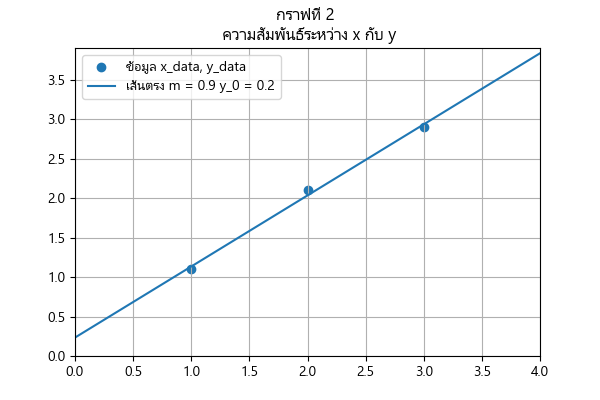

In [9]:
# กำหนดช่วงของตัวแปรอิสระ คือ เริ่มจาก 0 ถึง ข้อมูลสุดท้าย โดยแบงช่วนี้ออกเป็น 10 ส่วน
x = np.linspace(0,x_data[-1] + 1,10)
# ทำกราฟของข้อมูล
fig, ax = plt.subplots(figsize=(6, 4))
fig.canvas.header_visible = False
ax.grid(True)
ax.set_xlim([0, x_data[-1]+1])
ax.set_ylim([0, y_data[-1]+1])
ax.scatter(x_data, y_data)
ax.plot(x, fy(x,คำตอบ[m],คำตอบ[y_0]))
ax.legend(["ข้อมูล x_data, y_data", f"เส้นตรง m = {คำตอบ[m]:.1f} y_0 = {คำตอบ[y_0]:.1f}"])
ax.set_title("กราฟที่ 2 \n ความสัมพันธ์ระหว่าง x กับ y")
plt.show()

## สรุป

จากการการทดลองทราบว่า อัตราการเปลี่ยนแปลงของตัวแปรตามเทียบกับตัวแปรอิสระมีค่า $m$ = 0.9 และ ค่าเริ่มต้นของตัวแปรตาม $y$ มีค่า 0.2 ผลการทดลองนี้ต่างจากค่าจากทฤษฎีไม่เกินความไม่แน่นอนในการวัด กล่าวคือ ทฤษฎีบอกว่าอัตราการเปลียนแปลงคือ 1 มากกว่าค่าการทดลองคือ 0.9 ไป 0.1 ซึ่งไม่เกินความไม่แน่นอนในการวัดคือ 0.2 สำหรับจุดตัดแกนก็เช่นกันค่าไม่ต่างกันมากกว่า 0.2 ซึ่งหมายความว่า ความต่างนี้ไม่มีนัยสำคัญกล่าว คือ ทฤษฎีนี้ถูกต้องในช่วงตัวแปรต้นคือ $x$ ในช่วง 0 ถึง 3